In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# data
data = [
    ('toronto-neighbourhoods-2020-1-All-DatesByHourBucketsAggregate.csv', 'Toronto'),
    ('vienna-statistical_areas-2020-1-All-DatesByHourBucketsAggregate.csv', 'Vienna'),
    ('washington_DC-censustracts-2020-1-All-DatesByHourBucketsAggregate.csv', 'Washington D.C.'),
    ('pittsburgh-censustracts-2020-1-All-DatesByHourBucketsAggregate.csv', 'Pittsburgh'),
    ('manchester-msoa-2020-1-All-DatesByHourBucketsAggregate.csv', 'Manchester'),
]

In [3]:
def scatter(data):
    uber, location = data
    
    # read csv
    quarter1 = pd.read_csv(uber, usecols=['sourceid', 'dstid', 'month', 'day', 'start_hour', 'end_hour', 'mean_travel_time'])
    
    # mean travel time by day
    mean_travel_time_per_day = quarter1.groupby(['month', 'day'])['mean_travel_time'].mean()
    
    # plot
    xlabels = list()
    for month, day in mean_travel_time_per_day.index:
        xlabels.append('{:02d}-{:02d}'.format(month, day))
    plt.figure(figsize=(16,16))
    plt.rc('font', size=11)
    plt.rc('axes', labelsize=16)
    plt.scatter(xlabels, mean_travel_time_per_day.values, s=10, c='red')
    plt.ylabel('Mean Travel Time (Seconds)')
    plt.xlabel('Date')
    plt.xticks(rotation=80)
    plt.title('{}, Jan 2020 to March 2020'.format(location));

[None, None, None, None, None]

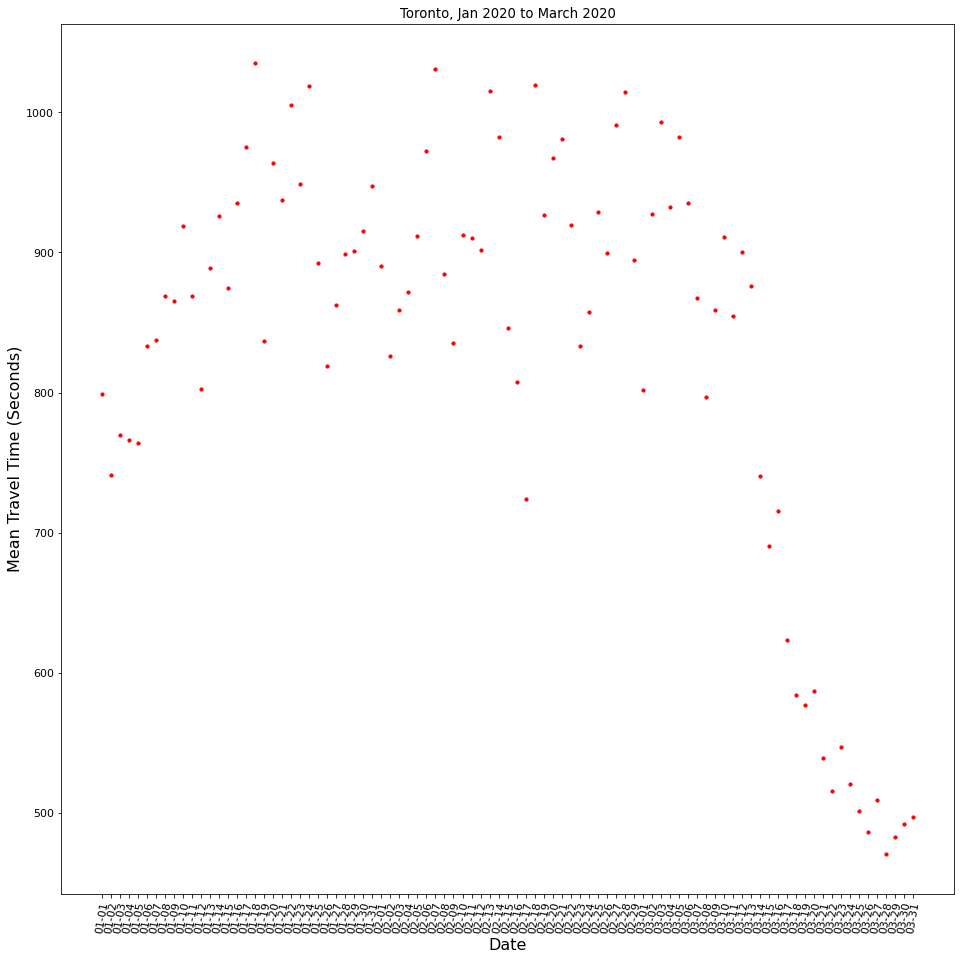

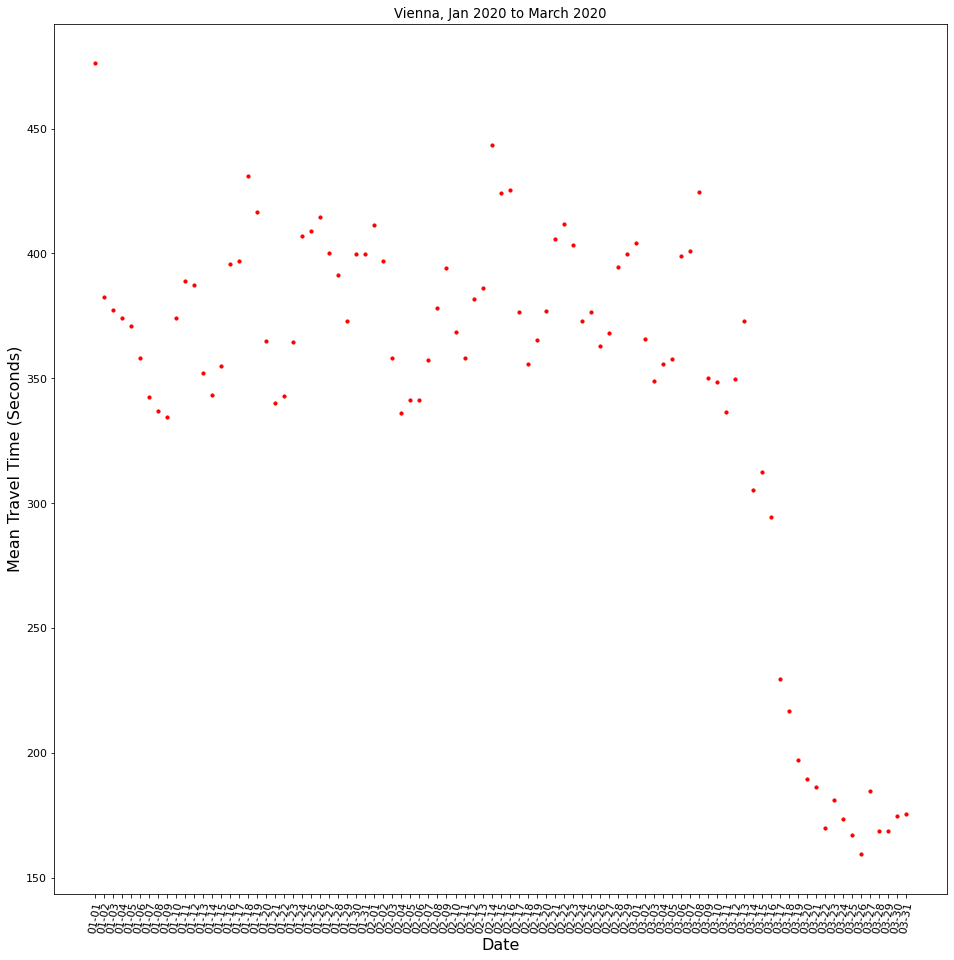

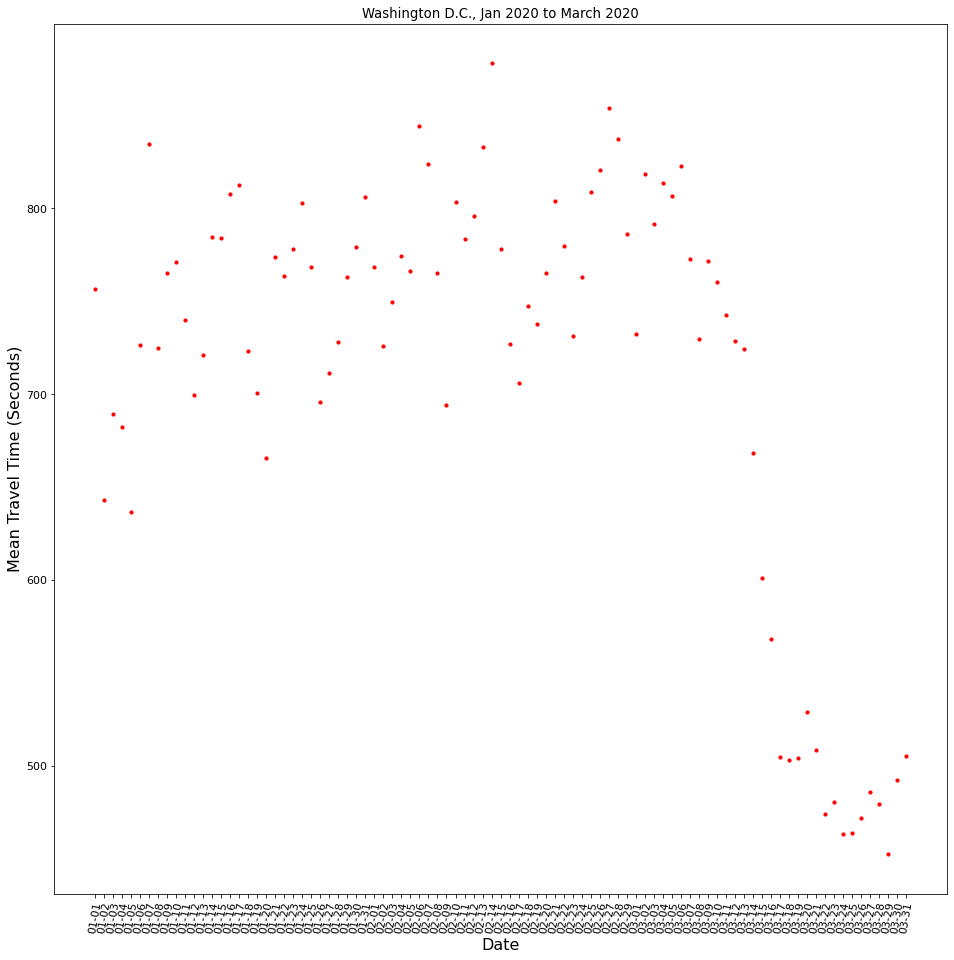

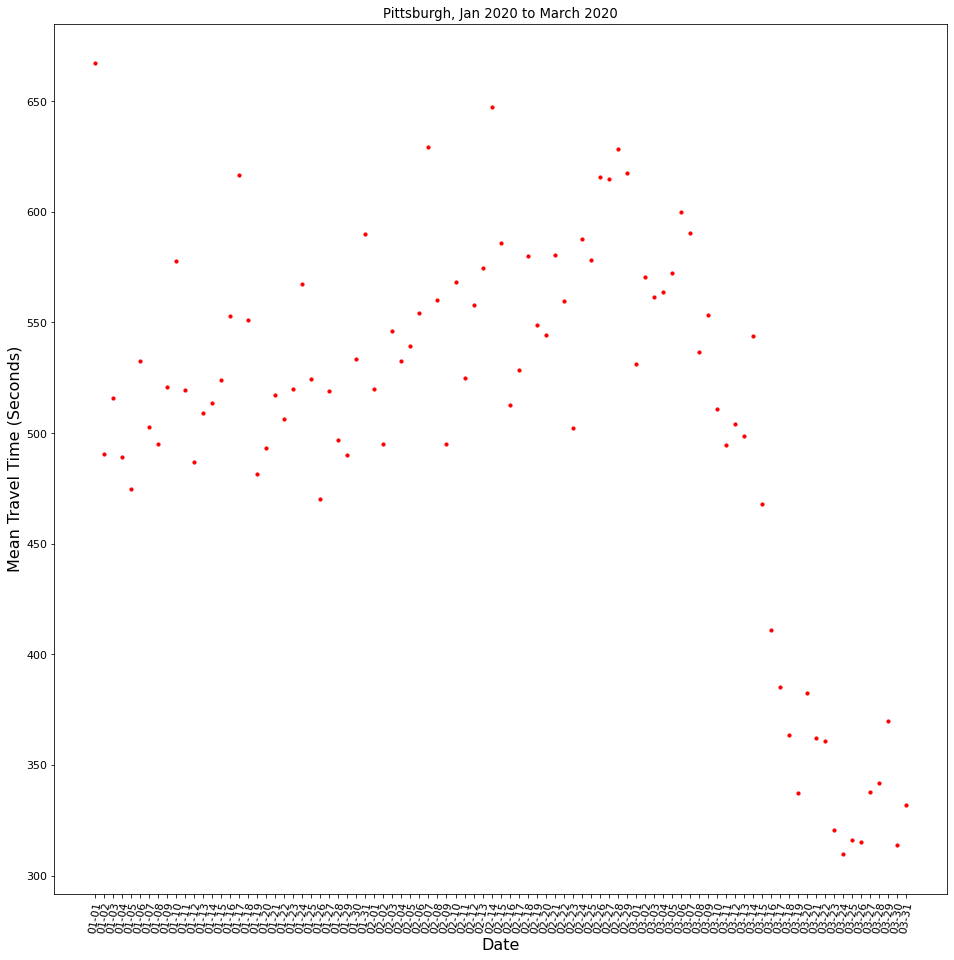

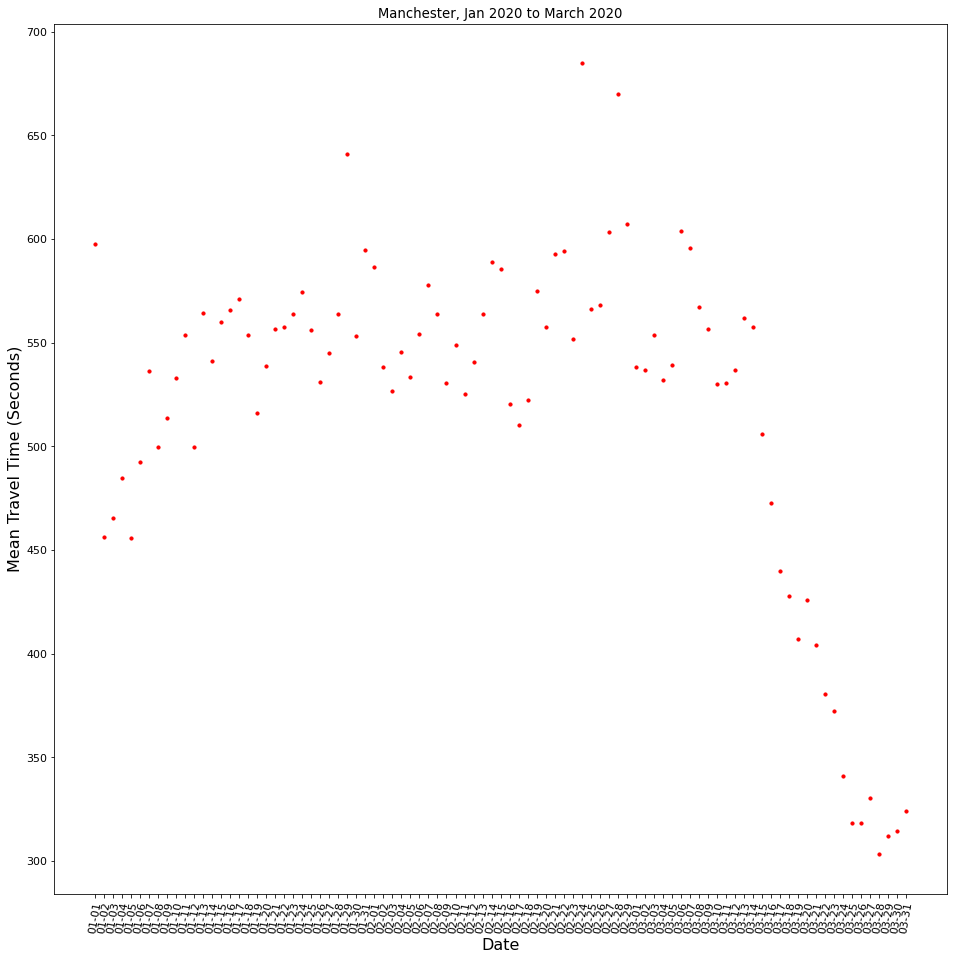

In [4]:
list(map(scatter, data))

In [5]:
lockdown_date = {'Toronto': '2020-03-17', 'Vienna':'2020-03-15', 'Washington D.C.':'2020-03-11','Pittsburgh':'2020-03-13','Manchester':'2020-03-16' }
def histogram(data):
    uber, location = data
    
    # read csv
    #types_dict = {'A': int, 'B': float}
    df = pd.read_csv(uber, usecols=['sourceid', 'dstid', 'month', 'day', 'start_hour', 'end_hour', 'mean_travel_time'])
    df['date'] = '2020-' + df['month'].astype(str)+'-'+ df['day'].astype(str)
    df['date'] = pd.to_datetime(df['date'])
    before = (df['date'] < lockdown_date[location])
    after = (df['date'] >= lockdown_date[location])
    data_before = df.loc[before]
    data_after = df.loc[after]
    

    # mean travel time by day
    mean_travel_time_before = data_before.groupby(['month', 'day'])['mean_travel_time'].mean()
    mean_travel_time_after = data_after.groupby(['month', 'day'])['mean_travel_time'].mean()
    d = {'Before Lockdown': mean_travel_time_before, 'After Lockdown': mean_travel_time_after}
    new_df = pd.DataFrame(data=d)
    ax = sns.displot(new_df, bins=65)
    ax.set(xlabel='Average Travel Times')
    ax.set(title=location + ' Histogram')
    

[None, None, None, None, None]

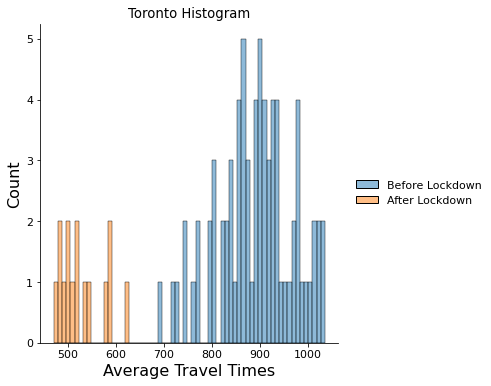

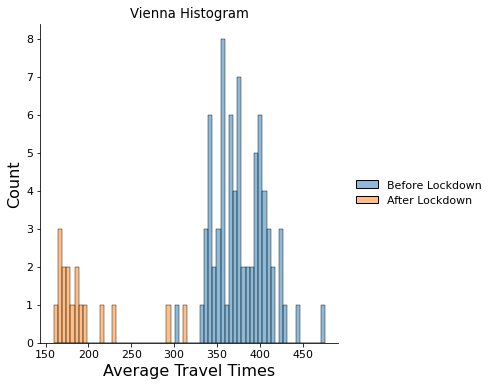

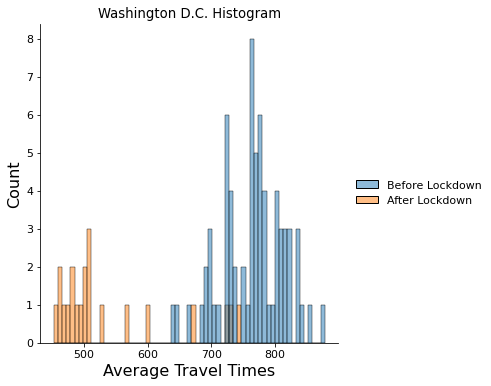

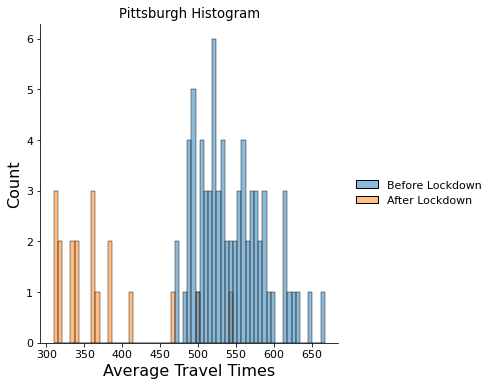

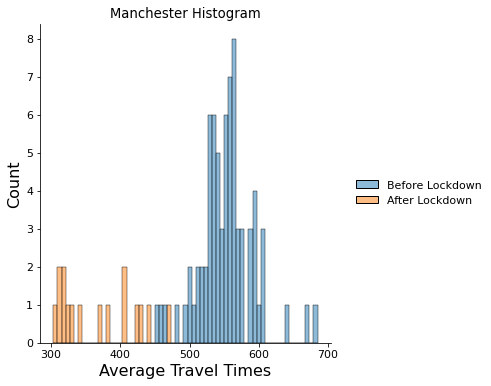

In [6]:
list(map(histogram, data))
#histogram(data[0], lockdown_date)